In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
plt.style.use('dark_background')

In [5]:
# Setting the display options to max 
pd.set_option('max_columns', 130)
pd.set_option('max_rows', 500)

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

In [6]:
# Reading the data_set 'application_data' as df
df = pd.read_csv('C:/demo/Assignment/EDA/application_data.csv')

In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

-  ### Subtask 1.2: Inspection of dataframe

In [8]:
print(df.shape)
print(type(df))
print(df.dtypes)

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE              

## Task 2: Cleaning the Data 

- ### Subtask 2.1: Inspection of Null Values

In [9]:
round(df.isnull().sum()/len(df.index)*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

##### Explanation:
on inspecting the data found that the the data set has multiple columns which has >50% of it's values missing. These columns should be removed.

- ### Subtask 2.2: Dropping unecessary columns

In [10]:
len(df.index)*50/100

153755.5

In [11]:
df = df.loc[:, (df.isnull().sum()<153755)]

In [12]:
# Checking the shape of df after gennric column removal 
print(df.shape)

(307511, 81)


- ### Subtask 2.2: Reporting of Missing values

In [13]:
round(df.isnull().sum()/len(df.index)*100, 4)

SK_ID_CURR                       0.0000
TARGET                           0.0000
NAME_CONTRACT_TYPE               0.0000
CODE_GENDER                      0.0000
FLAG_OWN_CAR                     0.0000
FLAG_OWN_REALTY                  0.0000
CNT_CHILDREN                     0.0000
AMT_INCOME_TOTAL                 0.0000
AMT_CREDIT                       0.0000
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
NAME_INCOME_TYPE                 0.0000
NAME_EDUCATION_TYPE              0.0000
NAME_FAMILY_STATUS               0.0000
NAME_HOUSING_TYPE                0.0000
REGION_POPULATION_RELATIVE       0.0000
DAYS_BIRTH                       0.0000
DAYS_EMPLOYED                    0.0000
DAYS_REGISTRATION                0.0000
DAYS_ID_PUBLISH                  0.0000
FLAG_MOBIL                       0.0000
FLAG_EMP_PHONE                   0.0000
FLAG_WORK_PHONE                  0.0000
FLAG_CONT_MOBILE                 0.0000


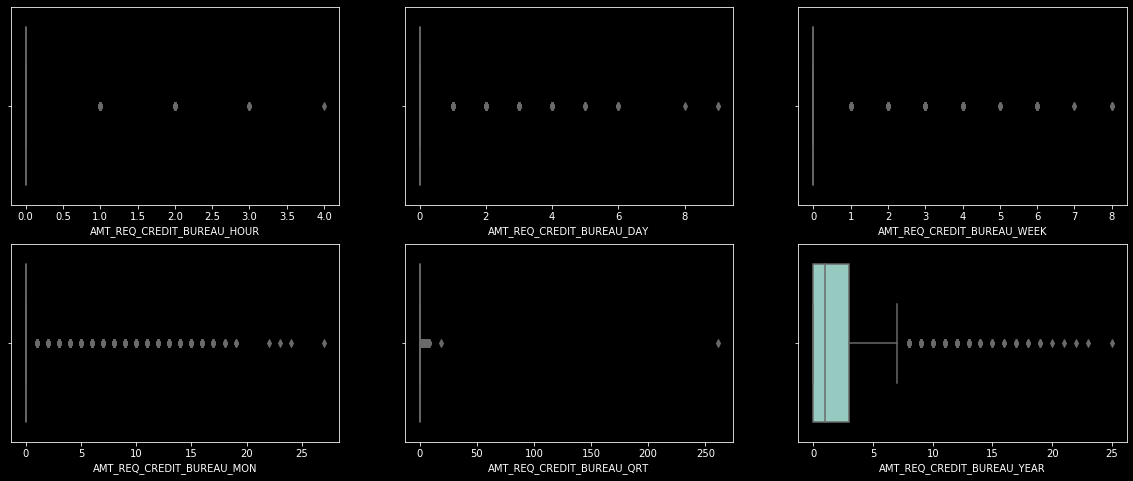

In [14]:
plt.figure(figsize = (20,8))
plt.subplot(231)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_HOUR)

plt.subplot(232)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_DAY)

plt.subplot(233)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_WEEK)

plt.subplot(234)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_MON)

plt.subplot(235)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_QRT)

plt.subplot(236)
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

In [15]:
df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
             'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
    'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


##### Explanation:
1. All the BUREAU columns except 'AMT_REQ_CREDIT_BUREAU_YEAR', should be imputed with the median value of 0, since they have outliers.
2. AMT_REQ_CREDIT_BUREAU_YEAR' should be imputed with the median value of 1, since it has outliers.

- ### Subtask 2.3: Imputation of Missing values

for the columns with missing values <1%

In [16]:
round(df.isnull().sum()/len(df.index)*100,4).sort_values().tail(25)

CNT_FAM_MEMBERS                  0.0007
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
EXT_SOURCE_2                     0.2146
OBS_60_CNT_SOCIAL_CIRCLE         0.3320
DEF_30_CNT_SOCIAL_CIRCLE         0.3320
OBS_30_CNT_SOCIAL_CIRCLE         0.3320
DEF_60_CNT_SOCIAL_CIRCLE         0.3320
NAME_TYPE_SUITE                  0.4201
AMT_REQ_CREDIT_BUREAU_MON       13.5016
AMT_REQ_CREDIT_BUREAU_WEEK      13.5016
AMT_REQ_CREDIT_BUREAU_DAY       13.5016
AMT_REQ_CREDIT_BUREAU_HOUR      13.5016
AMT_REQ_CREDIT_BUREAU_QRT       13.5016
AMT_REQ_CREDIT_BUREAU_YEAR      13.5016
EXT_SOURCE_3                    19.8253
OCCUPATION_TYPE                 31.3455
EMERGENCYSTATE_MODE             47.3983
TOTALAREA_MODE                  48.2685
YEARS_BEGINEXPLUATATION_MODE    48.7810
YEARS_BEGINEXPLUATATION_MEDI    48.7810
YEARS_BEGINEXPLUATATION_AVG     48.7810
FLOORSMAX_MODE                  49.7608
FLOORSMAX_MEDI                  49.7608
FLOORSMAX_AVG                   49.7608


In [17]:
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [18]:
# Since there are outliers, imputing the null values with median
df.loc[pd.isnull(df.AMT_ANNUITY), ['AMT_ANNUITY']] = df['AMT_ANNUITY'].median()

In [19]:
df.AMT_GOODS_PRICE.describe().round(0)

count     307233.0
mean      538396.0
std       369446.0
min        40500.0
25%       238500.0
50%       450000.0
75%       679500.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [20]:
# Since there are outliers, imputing the null values with median
df.loc[pd.isnull(df.AMT_GOODS_PRICE), ['AMT_GOODS_PRICE']] = df['AMT_GOODS_PRICE'].median()

In [21]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [22]:
# Since it's a categorical data, imputing the null values to the most frequent value. (Mode)
df.loc[pd.isnull(df.NAME_TYPE_SUITE), ['NAME_TYPE_SUITE']] = 'Unaccompanied'

In [23]:
df.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [24]:
# Since there are outliers, imputing the null values with median
df.loc[pd.isnull(df.CNT_FAM_MEMBERS), ['CNT_FAM_MEMBERS']] = df['CNT_FAM_MEMBERS'].median()

## Task 3: Subset of data

- ### Subtask 3.1: Creating a subset of data

Selecting the independant variable which are likely to influenece the dependant variable (Target).

In [25]:
# Creating the 'Total_BUREAU' which includes total no.of enquires to the Bureau.
df['Total_BUREAU'] = df.AMT_REQ_CREDIT_BUREAU_HOUR + df.AMT_REQ_CREDIT_BUREAU_DAY + df.AMT_REQ_CREDIT_BUREAU_WEEK + df.AMT_REQ_CREDIT_BUREAU_MON + df.AMT_REQ_CREDIT_BUREAU_QRT  + df.AMT_REQ_CREDIT_BUREAU_YEAR

In [26]:
# Creating a subset of df
sub = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
         'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
         'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
         'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH','DAYS_ID_PUBLISH', 
          'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 
         'REGION_RATING_CLIENT', 'LIVE_CITY_NOT_WORK_CITY', 'Total_BUREAU', 'DAYS_LAST_PHONE_CHANGE']]

In [27]:
sub.shape

(307511, 27)

In [28]:
# Checking of missing values
round(sub.isnull().sum()/len(sub.index)*100,4)

SK_ID_CURR                     0.0000
TARGET                         0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER                    0.0000
FLAG_OWN_CAR                   0.0000
FLAG_OWN_REALTY                0.0000
CNT_CHILDREN                   0.0000
AMT_INCOME_TOTAL               0.0000
AMT_CREDIT                     0.0000
AMT_ANNUITY                    0.0000
AMT_GOODS_PRICE                0.0000
NAME_TYPE_SUITE                0.0000
NAME_INCOME_TYPE               0.0000
NAME_EDUCATION_TYPE            0.0000
NAME_FAMILY_STATUS             0.0000
NAME_HOUSING_TYPE              0.0000
REGION_POPULATION_RELATIVE     0.0000
DAYS_BIRTH                     0.0000
DAYS_ID_PUBLISH                0.0000
FLAG_CONT_MOBILE               0.0000
FLAG_EMAIL                     0.0000
OCCUPATION_TYPE               31.3455
CNT_FAM_MEMBERS                0.0000
REGION_RATING_CLIENT           0.0000
LIVE_CITY_NOT_WORK_CITY        0.0000
Total_BUREAU                  13.5016
DAYS_LAST_PH

- ### Subtask 3.2: Negation of days columns
Negating the columns which has '-' days

In [29]:
sub['DAYS_LAST_PHONE_CHANGE'] = sub['DAYS_LAST_PHONE_CHANGE'].abs()
sub['DAYS_BIRTH'] = sub['DAYS_BIRTH'].abs()
sub['DAYS_ID_PUBLISH'] = sub['DAYS_ID_PUBLISH'].abs()

- ### Subtask 3.3: Changing the Data Type
Changing the data type for the required columns

In [30]:
sub.dtypes.sort_values()

SK_ID_CURR                      int64
TARGET                          int64
LIVE_CITY_NOT_WORK_CITY         int64
REGION_RATING_CLIENT            int64
FLAG_EMAIL                      int64
CNT_CHILDREN                    int64
FLAG_CONT_MOBILE                int64
DAYS_ID_PUBLISH                 int64
DAYS_BIRTH                      int64
CNT_FAM_MEMBERS               float64
REGION_POPULATION_RELATIVE    float64
Total_BUREAU                  float64
DAYS_LAST_PHONE_CHANGE        float64
AMT_GOODS_PRICE               float64
AMT_ANNUITY                   float64
AMT_CREDIT                    float64
AMT_INCOME_TOTAL              float64
NAME_TYPE_SUITE                object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
FLAG_OWN_REALTY                object
OCCUPATION_TYPE                object
FLAG_OWN_CAR                   object
CODE_GENDER                    object
NAME_CONTRACT_TYPE             object
NAME_INCOME_TYPE               object
NAME_EDUCATI

In [31]:
sub['CNT_FAM_MEMBERS'] = sub['CNT_FAM_MEMBERS'].astype(int)

In [32]:
sub.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [33]:
sub.loc[pd.isnull(sub.DAYS_LAST_PHONE_CHANGE), ['DAYS_LAST_PHONE_CHANGE']] = sub['DAYS_LAST_PHONE_CHANGE'].median()

In [34]:
sub['DAYS_LAST_PHONE_CHANGE'] = sub['DAYS_LAST_PHONE_CHANGE'].astype(int)

## Task 4: Detection and Treatment of Outliers

- ### Subtask 4.1: Detection of Outliers for continuous variables

In [35]:
sub[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe().round(0)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,307511.0,307511.0,307511.0,307511.0
mean,168798.0,599026.0,27108.0,538316.0
std,237123.0,402491.0,14493.0,369289.0
min,25650.0,45000.0,1616.0,40500.0
25%,112500.0,270000.0,16524.0,238500.0
50%,147150.0,513531.0,24903.0,450000.0
75%,202500.0,808650.0,34596.0,679500.0
max,117000000.0,4050000.0,258026.0,4050000.0


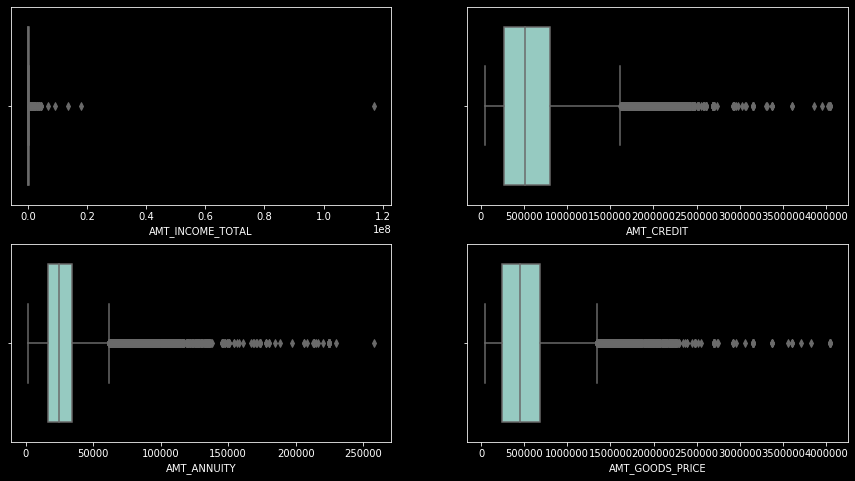

In [36]:
plt.figure(figsize = (15,8))
plt.subplot(221)
sns.boxplot(sub.AMT_INCOME_TOTAL)

plt.subplot(222)
sns.boxplot(sub.AMT_CREDIT)

plt.subplot(223)
sns.boxplot(sub.AMT_ANNUITY)

plt.subplot(224)
sns.boxplot(sub.AMT_GOODS_PRICE)
plt.show()

##### Explanation:
From the above statistics and graph it is clearly visible that the attributes have outliers, which has to be treated. The outliers should be capped to the upper limit/ the 99th percentile.

- ### Subtask 4.2: Treatment of Outliers for continuous variables

In [37]:
sub.AMT_INCOME_TOTAL.quantile([0.5,0.75,0.90,0.95,0.99])

0.50    147150.0
0.75    202500.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [38]:
sub.loc[(sub.AMT_INCOME_TOTAL > 337500), ['AMT_INCOME_TOTAL']] = sub['AMT_INCOME_TOTAL'].quantile(0.95)

In [39]:
sub.AMT_CREDIT.quantile([0.5,0.75,0.90,0.95,0.99])

0.50     513531.0
0.75     808650.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [40]:
sub.loc[(sub.AMT_CREDIT > 1350000), ['AMT_CREDIT']] = sub['AMT_CREDIT'].quantile(0.95)

In [41]:
sub.AMT_ANNUITY.quantile([0.5,0.75,0.90,0.95,0.99])

0.50    24903.0
0.75    34596.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [42]:
sub.loc[(sub.AMT_ANNUITY > 53325), ['AMT_ANNUITY']] = sub['AMT_ANNUITY'].quantile(0.95)

In [43]:
sub.AMT_GOODS_PRICE.quantile([0.5,0.75,0.90,0.95,0.99])

0.50     450000.0
0.75     679500.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [44]:
sub.loc[(sub.AMT_GOODS_PRICE > 1305000), ['AMT_GOODS_PRICE']] = sub['AMT_GOODS_PRICE'].quantile(0.95)

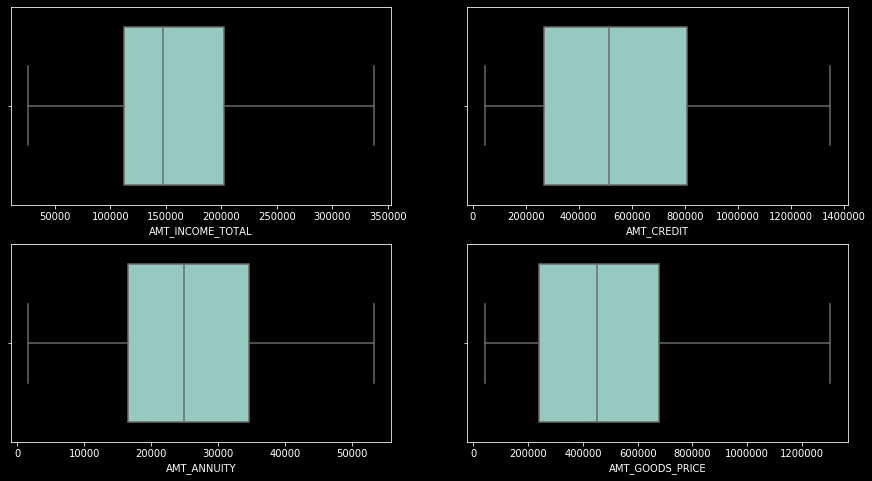

In [45]:
plt.figure(figsize = (15,8))
plt.subplot(221)
sns.boxplot(sub.AMT_INCOME_TOTAL)

plt.subplot(222)
sns.boxplot(sub.AMT_CREDIT)

plt.subplot(223)
sns.boxplot(sub.AMT_ANNUITY)

plt.subplot(224)
sns.boxplot(sub.AMT_GOODS_PRICE)
plt.show()

##### Explanation:
For the above attributes the ouliers have been capped to the 95th percentile. Meaning for all the values which are above the 95th percentile has been changed to the value of the 95th percentile.

- ### Subtask 4.3: Detection of Outliers for other numerical variables

In [46]:
sub[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].describe()

,CNT_CHILDREN,CNT_FAM_MEMBERS
count,307511.000000,307511.000000
mean,0.417052,2.152664
std,0.722121,0.910679
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,2.000000
75%,1.000000,3.000000
max,19.000000,20.000000


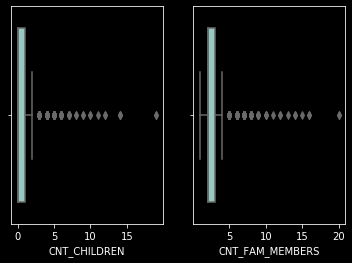

In [47]:
plt.figure()
plt.subplot(121)
sns.boxplot(sub.CNT_CHILDREN)

plt.subplot(122)
sns.boxplot(sub.CNT_FAM_MEMBERS)
plt.show()

In [48]:
sub.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [49]:
sub.CNT_FAM_MEMBERS.value_counts()

2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
16         2
12         2
14         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

##### Explanation:
The boxplot clearly shows that this attributes are having outliers. However from the value_count we can notice that the no.of outliers are very less, when comparied to the entier data set. Hence these outliers can be removed.

- ### Subtask 4.4: Treatment of Outliers for other numerical variables

In [50]:
sub.CNT_CHILDREN.quantile([0.5,0.75,0.90,0.95,0.99])

0.50    0.0
0.75    1.0
0.90    2.0
0.95    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64

In [51]:
sub = sub.loc[(sub.CNT_CHILDREN <= 3), :]

In [52]:
sub.CNT_FAM_MEMBERS.quantile([0.5,0.75,0.90,0.95,0.99])

0.50    2.0
0.75    3.0
0.90    3.0
0.95    4.0
0.99    5.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [53]:
sub = sub.loc[(sub.CNT_FAM_MEMBERS <= 5), :]

In [54]:
sub.shape

(306956, 27)

##### Explanation:
- Since majority of the data lies within the 99th percentile, the values which are above the 99th percentile has been removed. 
- Note: These values may have been correct, but keeping those values will affect the modeling, hence this method was chosen.

## Task 5: Binning 

- ### Subtask 5.1: convertion of days to years.

In [55]:
sub['DAYS_BIRTH'] = sub['DAYS_BIRTH']/365

In [56]:
sub.rename(columns = {'DAYS_BIRTH': 'Age'}, inplace = True)

In [57]:
sub['Age'] = sub['Age'].astype(int)

- ###  Subtask 5.2: Binning/Quantization of columns

In [58]:
sub.Age.min()

20

In [59]:
sub.Age.max()

69

In [60]:
Age_labels = ['<30',  '30-40', '40-50', '50-60', '60+']
Age_bins = [0, 30, 40, 50, 60, 70]
sub['Age_Group'] = pd.cut(sub['Age'], bins = Age_bins, labels = Age_labels)

##### Explanation:
The column 'Age' has been grouped into diffrent age groups, this is for the purpose of better analysis and finding patterns for a particular age group. 

In [61]:
sub.AMT_INCOME_TOTAL.quantile([0.2,0.25,0.5,0.75,0.95,0.99])

0.20     99000.0
0.25    112500.0
0.50    147600.0
0.75    202500.0
0.95    337500.0
0.99    337500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [62]:
Income_labeles = ['Low', 'Average', 'High', 'Very_High']
Income_bins = [0.25, 0.5, 0.75, 0.9, 1]
sub['Income_Group'] = pd.qcut(sub['AMT_INCOME_TOTAL'], q = Income_bins, labels = Income_labeles)

In [63]:
sub.Income_Group.value_counts()

Low          84068
Average      82055
High         44300
Very_High    27109
Name: Income_Group, dtype: int64

##### Explanation:
The Income column is grouped based on Quantization method using the quantiles. This is done to segregate the income of applicants to different income classes.

## Task 6: Imbalance of Data
- ###  Subtask 6.1: Checking the imbalance percentage.

In [64]:
(sub['TARGET'].value_counts(normalize = True)*100).round(2)

0    91.94
1     8.06
Name: TARGET, dtype: float64

In [65]:
(sub[~(sub.CODE_GENDER == 'XNA')].CODE_GENDER.value_counts(normalize = True)*100).round(2)

F    65.85
M    34.15
Name: CODE_GENDER, dtype: float64

## Task 7: Univariate Analysis 
- ### Subtask 7.1: Dividing the data set based on Target

In [66]:
one = sub.loc[sub.TARGET == 1, :]
zero = sub.loc[sub.TARGET == 0, :]

- ### Subtask 7.2: Univariate Analysis for categorical variables

In [67]:
(sub.dtypes == 'object').sort_values().tail(11)

TARGET                 False
NAME_EDUCATION_TYPE     True
NAME_TYPE_SUITE         True
NAME_HOUSING_TYPE       True
OCCUPATION_TYPE         True
FLAG_OWN_REALTY         True
FLAG_OWN_CAR            True
CODE_GENDER             True
NAME_CONTRACT_TYPE      True
NAME_INCOME_TYPE        True
NAME_FAMILY_STATUS      True
dtype: bool

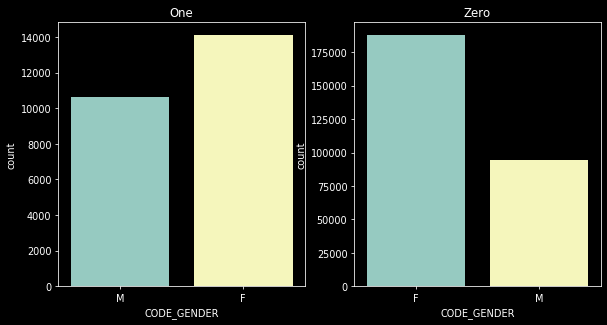

In [68]:
plt.figure(figsize = (10,5), dpi = 70)
plt.subplot(121)
plt.title('One')
sns.countplot('CODE_GENDER', data = one)

plt.subplot(122)
plt.title('Zero')
sns.countplot('CODE_GENDER', data = zero[~(zero.CODE_GENDER == 'XNA')])
plt.show()

##### Explanation: CODE_GENDER
1. Females are more likely to take the credit than man.
2. Men are more likely to be default since they are facing payment difficulties more than repayment.

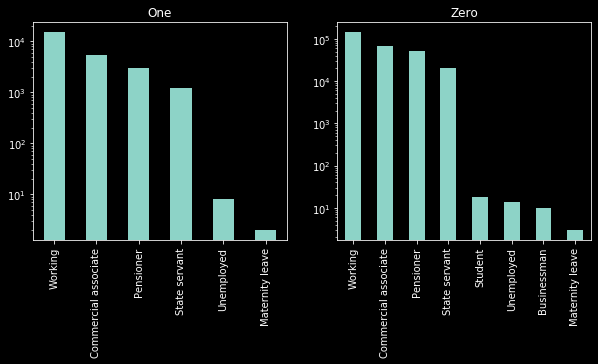

In [101]:
plt.figure(figsize = (10,4))
plt.subplot(121)
plt.yscale('log')
plt.title('One')
one.NAME_INCOME_TYPE.value_counts().plot.bar()

plt.subplot(122)
plt.yscale('log')
plt.title('Zero')
zero.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.show()

##### Explanation: NAME_INCOME_TYPE
1. Students and Businessman have 100% of repayment. (They are not having any payment difficulties)
2. Working, Commercial associates, pensioners and state servant people are more likely to take up credit.

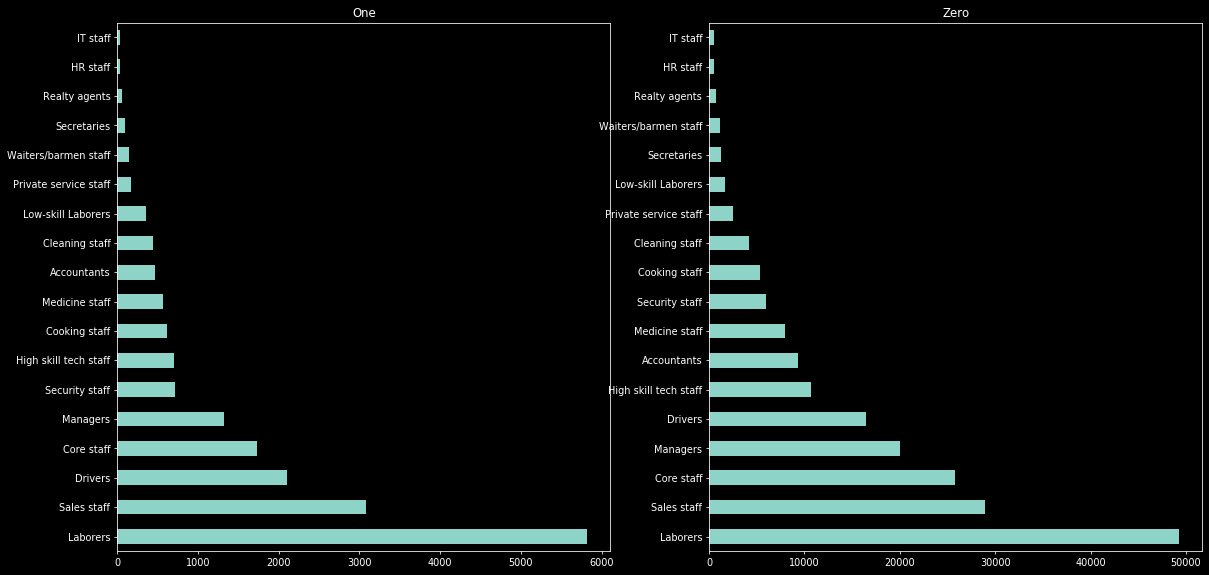

In [70]:
plt.figure(figsize= (20,10), dpi = 70)
plt.subplot(121)
plt.title('One')
one.OCCUPATION_TYPE.value_counts().plot.barh()

plt.subplot(122)
plt.title('Zero')
zero.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

##### Explanation: OCCUPATION_TYPE
1. Labour segment people are more likely to take up loan.

In [71]:
one['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special', 'secondary special', inplace = True)
zero['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special', 'secondary special', inplace = True)

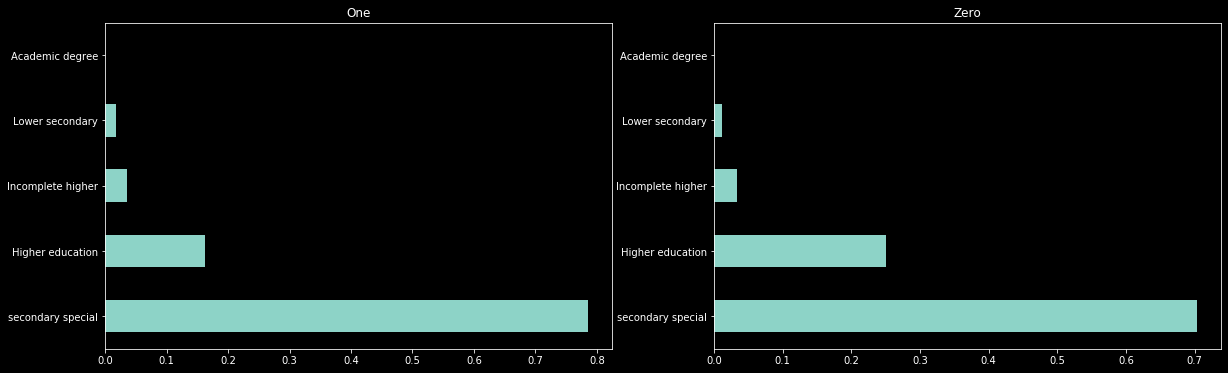

In [72]:
plt.figure(figsize = (20,6))
plt.subplot(121)
plt.title('One')
one.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.barh()

plt.subplot(122)
plt.title('Zero')
zero.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.barh()
plt.show()

##### Explanation: NAME_EDUCATION_TYPE
1. Higher education people face less payment difficulties compared to all the other sector, as their repayment percentage is greater than their percentage of having payment difficulties.
2. Academic degree people are less likely to opt for loan.

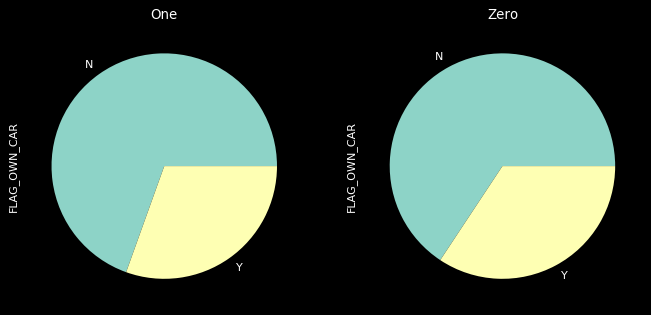

In [73]:
plt.figure(figsize = (10,6), dpi = 80)
plt.subplot(121)
plt.title('One')
one.FLAG_OWN_CAR.value_counts().plot.pie()

plt.subplot(122)
plt.title('Zero')
zero.FLAG_OWN_CAR.value_counts().plot.pie()
plt.show()

##### Explanation: FLAG_OWN_CAR
This attribute does not impact the Target variable much as it has almost similar pattern between people with payment difficulties and without.

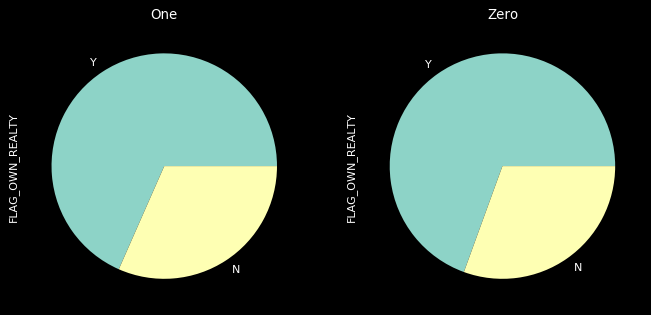

In [74]:
plt.figure(figsize = (10,6), dpi = 80)
plt.subplot(121)
plt.title('One')
one.FLAG_OWN_REALTY.value_counts().plot.pie()

plt.subplot(122)
plt.title('Zero')
zero.FLAG_OWN_REALTY.value_counts().plot.pie()
plt.show()

##### Explanation: FLAG_OWN_REALTY
This attribute does not impact the Target variable much as it has almost similar pattern between people with payment difficulties and without.

- ### Subtask 7.3: Univariate Analysis for numerical variables

In [75]:
(sub.dtypes == 'object').sort_values().head(20)

SK_ID_CURR                    False
DAYS_LAST_PHONE_CHANGE        False
Total_BUREAU                  False
LIVE_CITY_NOT_WORK_CITY       False
REGION_RATING_CLIENT          False
CNT_FAM_MEMBERS               False
FLAG_EMAIL                    False
FLAG_CONT_MOBILE              False
DAYS_ID_PUBLISH               False
Age                           False
REGION_POPULATION_RELATIVE    False
Age_Group                     False
Income_Group                  False
AMT_GOODS_PRICE               False
AMT_ANNUITY                   False
AMT_CREDIT                    False
AMT_INCOME_TOTAL              False
CNT_CHILDREN                  False
TARGET                        False
NAME_EDUCATION_TYPE            True
dtype: bool

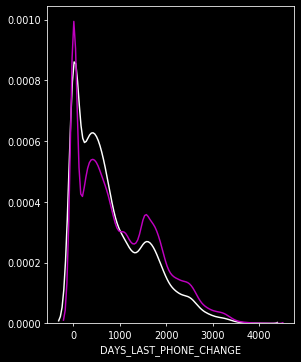

In [76]:
plt.figure(figsize = (10,6),  dpi = 70)
plt.subplot(121)
sns.distplot(one.DAYS_LAST_PHONE_CHANGE, hist = False, color = 'w')

plt.subplot(121)
sns.distplot(zero.DAYS_LAST_PHONE_CHANGE, hist = False, color = 'm')
plt.show()

##### Explanation: DAYS_LAST_PHONE_CHANGE
1. Assumption :- 0 refers to the people who have not changed the phone at all.
2. White line represents people who have payment difficulties.
3. Can oberve the pattern that People who are more likely to default tend to change their phone before applying for loan.

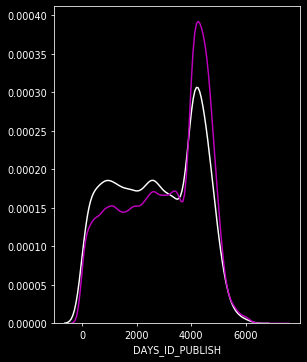

In [77]:
plt.figure(figsize = (10,6),  dpi = 70)
plt.subplot(121)
sns.distplot(one.DAYS_ID_PUBLISH, hist = False, color = 'w')

plt.subplot(121)
sns.distplot(zero.DAYS_ID_PUBLISH, hist = False, color = 'm')
plt.show()

##### Explanation: DAYS_ID_PUBLISH
1. Assumption :- 0 refers to the people who have not changed the ID at all.
2. White line represents people who have payment difficulties.
3. Can spot the pattern that people who are more likely to default tend to change their ID's before applying for the loan.

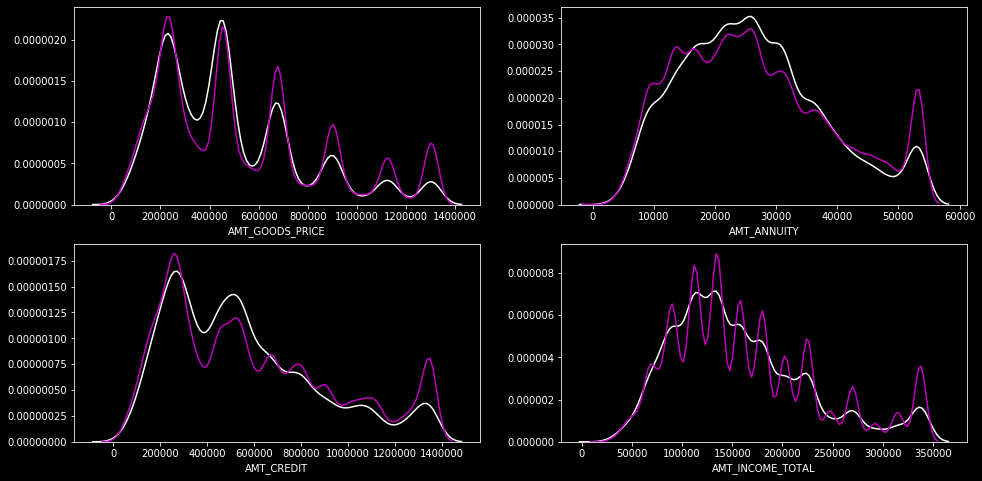

In [78]:
plt.figure(figsize = (16,8))
plt.subplot(221)
sns.distplot(one.AMT_GOODS_PRICE, hist = False, color = 'w')
plt.subplot(222)
sns.distplot(one.AMT_ANNUITY, hist = False, color = 'w')
plt.subplot(223)
sns.distplot(one.AMT_CREDIT, hist = False, color = 'w')
plt.subplot(224)
sns.distplot(one.AMT_INCOME_TOTAL, hist = False, color = 'w')

plt.subplot(221)
sns.distplot(zero.AMT_GOODS_PRICE, hist = False, color = 'm')
plt.subplot(222)
sns.distplot(zero.AMT_ANNUITY, hist = False, color = 'm')
plt.subplot(223)
sns.distplot(zero.AMT_CREDIT, hist = False, color = 'm')
plt.subplot(224)
sns.distplot(zero.AMT_INCOME_TOTAL, hist = False, color = 'm')
plt.show()

##### Explanation: AMT_GOODS_PRICE, AMT_ANNUITY, AMT_CREDIT, AMT_INCOME_TOTAL
1. White line represents people who have payment difficulties.
2. Can spot the pattern that people who are not having any payment difficulties are having higher income.
3. Other variables seems to be same. Not much of difference spoted.

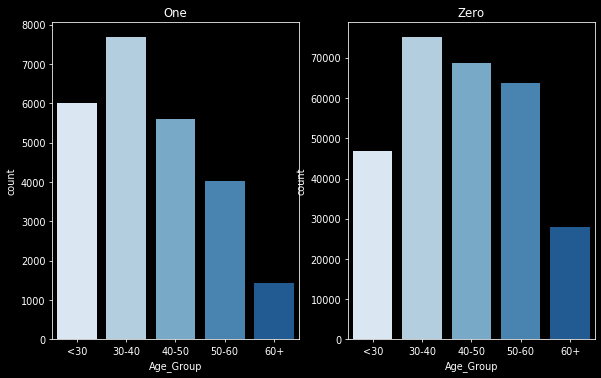

In [79]:
plt.figure(figsize = (10,6), dpi = 70)
plt.subplot(121)
plt.title('One')
sns.countplot('Age_Group', data = one, palette = 'Blues')

plt.subplot(122)
plt.title('Zero')
sns.countplot('Age_Group', data = zero, palette = 'Blues')
plt.show()

##### Explanation: Age_Group
1. People of the age group <30 are having more payment difficulties and are more likely to default.
2. People above the age group 60+ are having a better repayment pecent comparied to their payment difficulty percent.

## Task 8: Correlation and Causation
- ### Subtask 8.1: Calculation of Correlation.

In [80]:
onecor = one[['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE']]
zerocor = zero[['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE']]

In [81]:
one_cor = onecor.corr()
zero_cor = zerocor.corr()

In [82]:
one_cor

,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE
AMT_GOODS_PRICE,1.000000,0.765438,0.980486,0.357822,0.078113
AMT_ANNUITY,0.765438,1.000000,0.767028,0.434312,0.068974
AMT_CREDIT,0.980486,0.767028,1.000000,0.354454,0.070163
AMT_INCOME_TOTAL,0.357822,0.434312,0.354454,1.000000,0.117919
REGION_POPULATION_RELATIVE,0.078113,0.068974,0.070163,0.117919,1.000000


In [83]:
zero_cor

,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE
AMT_GOODS_PRICE,1.000000,0.802559,0.985478,0.417352,0.098430
AMT_ANNUITY,0.802559,1.000000,0.800869,0.489143,0.113655
AMT_CREDIT,0.985478,0.800869,1.000000,0.410605,0.091901
AMT_INCOME_TOTAL,0.417352,0.489143,0.410605,1.000000,0.190338
REGION_POPULATION_RELATIVE,0.098430,0.113655,0.091901,0.190338,1.000000


- ### Subtask 8.2: Heat Map

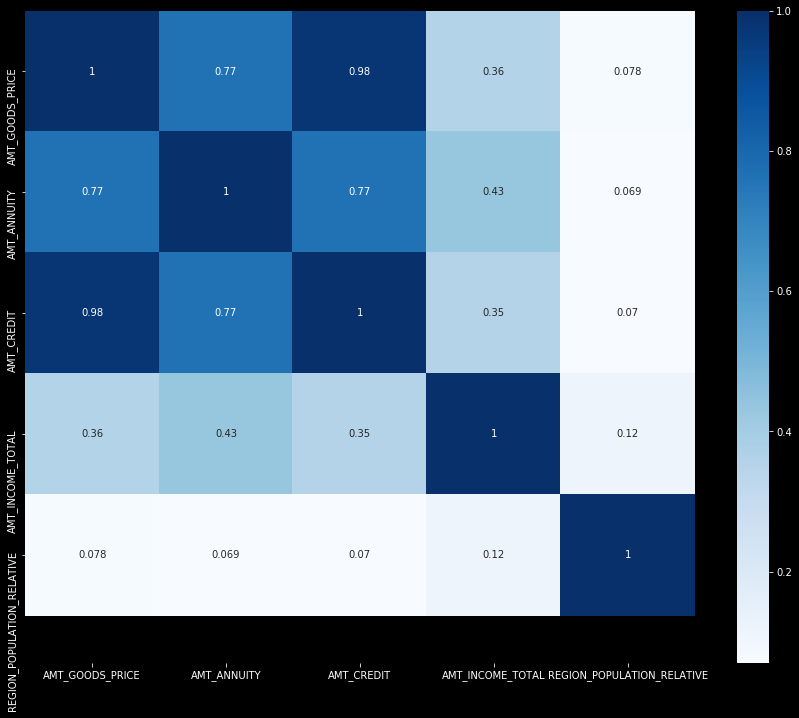

In [84]:
plt.figure(figsize = (15,12))
one_heat = sns.heatmap(one_cor, annot = True, cmap = 'Blues')
bottom, top = one_heat.get_ylim()
one_heat.set_ylim(bottom+0.9, top-0.5)
plt.show()

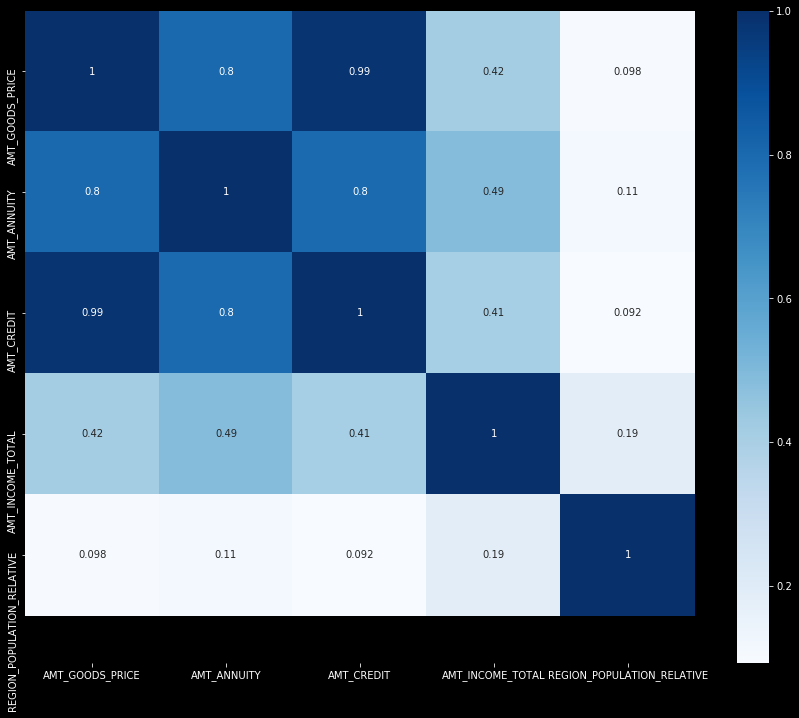

In [85]:
plt.figure(figsize = (15,12))
zero_heat = sns.heatmap(zero_cor, annot = True, cmap = 'Blues')
bottom, top = zero_heat.get_ylim()
zero_heat.set_ylim(bottom+0.9, top-0.5)
plt.show()

##### Explanation: Correlation and causation.
1. There exists a perfect correlation and causation between the variables 'AMT_GOODS_PRICE', 'AMT_ANNUITY' and 'AMT_CREDIT'. Makes sense as the Goods prince is the amount for which loan is applied. It's same for both 1 and 0.
2. The attribute 'AMT_INCOME_TOTAL' has slightly higher correlation for the Target variable 0.
3. There is no or verry little correlation between the variables 'REGION_POPULATION_RELATIVE' and 'TARGET'.

## Task 9: Bivariate Analysis
- ### Subtask 9.1: Bivariate analysis

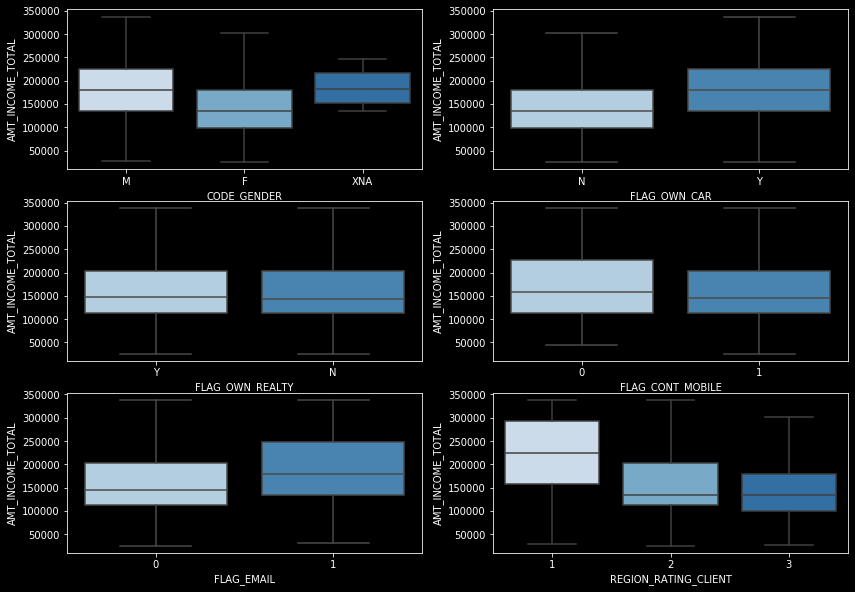

In [100]:
plt.figure(figsize = (14,10))
a = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT']
for i in enumerate(a):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x = i[1], y = 'AMT_INCOME_TOTAL', data = sub, showfliers = False, palette = 'Blues')